In [1]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv("../../Data/processed/final.csv")  


In [4]:
TARGET_COL = 'result'

feature_cols = [
    'num_dots',
    'num_hyphens', 
    'num_slashes',
    'num_digits',
    'num_equals',
    'ip_in_url',
    'has_highly_susp_keyword',
    'hostname_length',
    'has_additional_susp_words',
    'has_susp_word_in_path',
    'has_susp_word_in_hostname',
    'has_suspicious_tld',
    'has_uncommon_tld',
    'url_entropy',
    'subdomain_count',
    'no_www',
    'tld_length',
    'short_url',
    'consonant_pair_ratio',
    'punctuation_density',
    'hex_encoding_count',
    'num_subdirs',
    'AtSymbol',
    'NumUnderscore',
    'HasQueryString',
    # 'filename_length',

    'path_length',
    
    'max_dir_length',

    'hostname_uncommonness',
    'longest_dir_uncommonness'
]

X = df[feature_cols]  
y = df[TARGET_COL] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')   
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\Lenovo\Documents\FSTE\S4\AI\project\Malicious-URLs\venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                   validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9637 - loss: 0.1115 - val_accuracy: 0.9818 - val_loss: 0.0581
Epoch 2/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9805 - loss: 0.0620 - val_accuracy: 0.9829 - val_loss: 0.0537
Epoch 3/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9808 - loss: 0.0606 - val_accuracy: 0.9835 - val_loss: 0.0518
Epoch 4/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9842 - val_loss: 0.0505
Epoch 5/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9824 - loss: 0.0562 - val_accuracy: 0.9841 - val_loss: 0.0498
Epoch 6/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9831 - loss: 0.0546 - val_accuracy: 0.9846 - val_loss: 0.0482
Epoch 7/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9850 - val_loss: 0.0483
Epoch 8/20
10910/10910 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

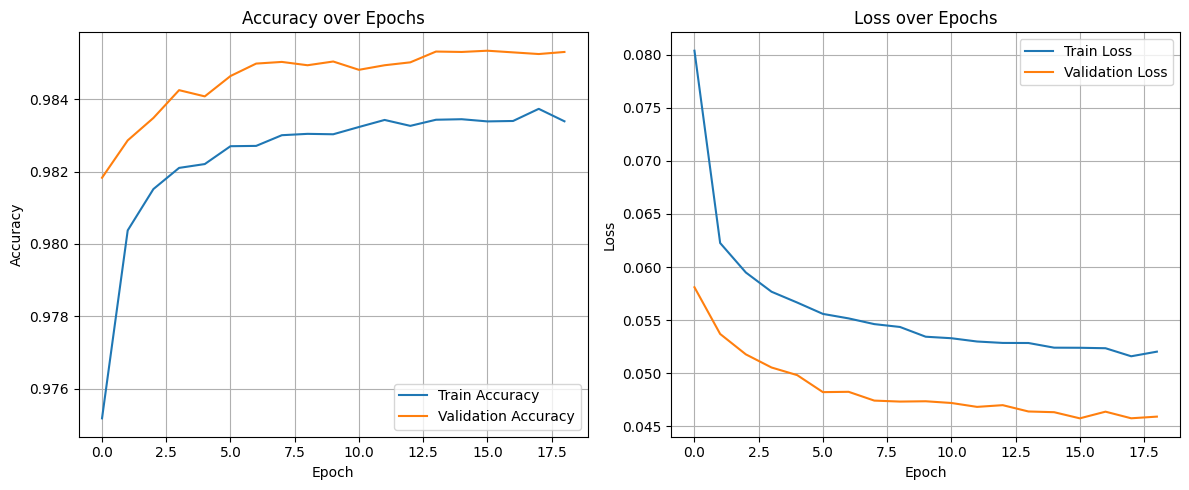

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score: {f1:.4f} ({f1*100:.2f}%)")
print("\nRapport détaillé:")
print(classification_report(y_test, y_pred_binary))

print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred_binary))

3410/3410 ━━━━━━━━━━━━━━━━━━━━ 3s 845us/step
Accuracy: 0.9851 (98.51%)
Precision: 0.9887 (98.87%)
Recall: 0.9705 (97.05%)
F1-Score: 0.9795 (97.95%)

Rapport détaillé:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     69148
         1.0       0.99      0.97      0.98     39949

    accuracy                           0.99    109097
   macro avg       0.99      0.98      0.98    109097
weighted avg       0.99      0.99      0.99    109097


Matrice de confusion:
[[68705   443]
 [ 1180 38769]]
